<a href="https://colab.research.google.com/github/jo-Adi/mechine-learning/blob/main/Copy_of_%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,27036.8565,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,4358.000000,Doctor,23500.0,5.0,7.605312e+07,2024-11-04 08:08:08,2.0
1,TX000002,AC00455,721948.3840,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,4234.000000,Doctor,40900.0,5.0,2.046878e+08,2024-11-04 08:09:35,0.0
2,TX000003,AC00019,242331.8265,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,1196.000000,Student,16250.0,5.0,1.669701e+07,2024-11-04 08:07:04,3.0
3,TX000004,AC00070,354028.0850,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,1630.000000,Student,7260.0,5.0,1.274798e+08,2024-11-04 08:09:06,3.0
4,TX000005,AC00411,25808.7925,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,2788.063517,Student,57430.0,5.0,1.105254e+08,2024-11-04 08:06:39,NaN


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2535
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2487 non-null   object 
 1   AccountID                2495 non-null   object 
 2   TransactionAmount        2516 non-null   float64
 3   TransactionDate          2488 non-null   object 
 4   TransactionType          2486 non-null   object 
 5   Location                 2486 non-null   object 
 6   DeviceID                 2486 non-null   object 
 7   IP Address               2496 non-null   object 
 8   MerchantID               2493 non-null   object 
 9   Channel                  2489 non-null   object 
 10  CustomerAge              2516 non-null   float64
 11  CustomerOccupation       2493 non-null   object 
 12  TransactionDuration      2516 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance           2516

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
count,2.516000e+03,2516.000000,2516.000000,2516.000000,2.516000e+03,2364.000000
mean,5.713206e+05,2785.999660,34678.024229,5.490547,7.613127e+07,1.500846
std,5.583154e+05,1100.790143,20190.212745,2.377456,5.767075e+07,1.118649
min,4.991610e+02,1134.000000,2910.000000,5.000000,1.506371e+06,0.000000
25%,1.595287e+05,1692.000000,18280.000000,5.000000,2.260341e+07,0.750000
50%,4.096460e+05,2808.000000,33070.000000,5.000000,7.201081e+07,2.000000
75%,7.859516e+05,3676.000000,46700.000000,5.000000,1.136731e+08,3.000000
max,3.682484e+06,4978.000000,87010.000000,21.000000,2.228238e+08,3.000000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

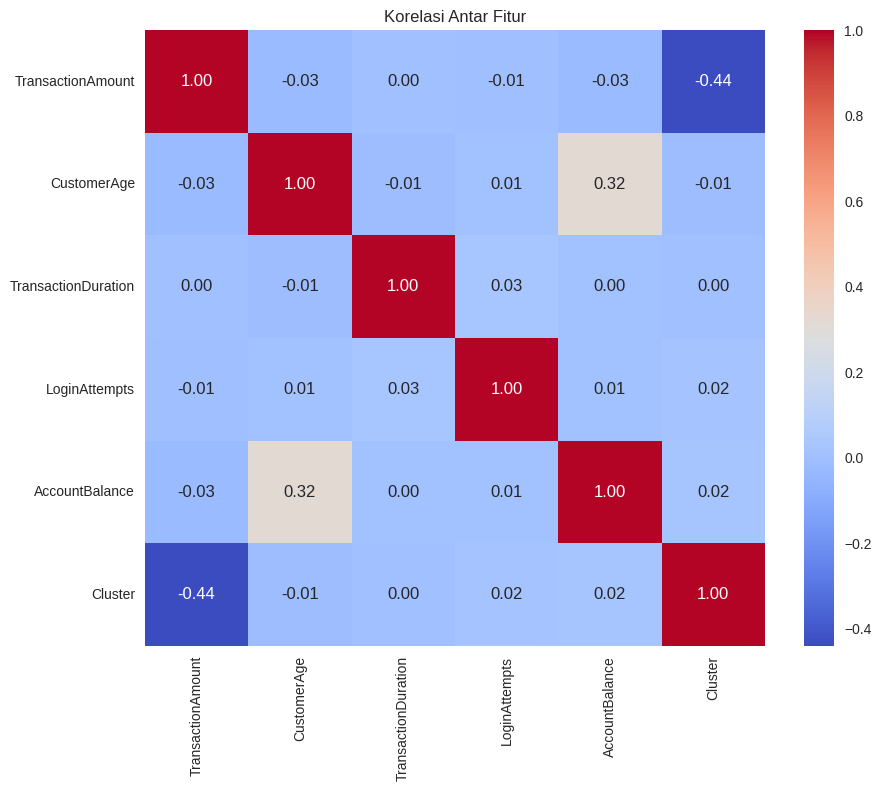

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10 , 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

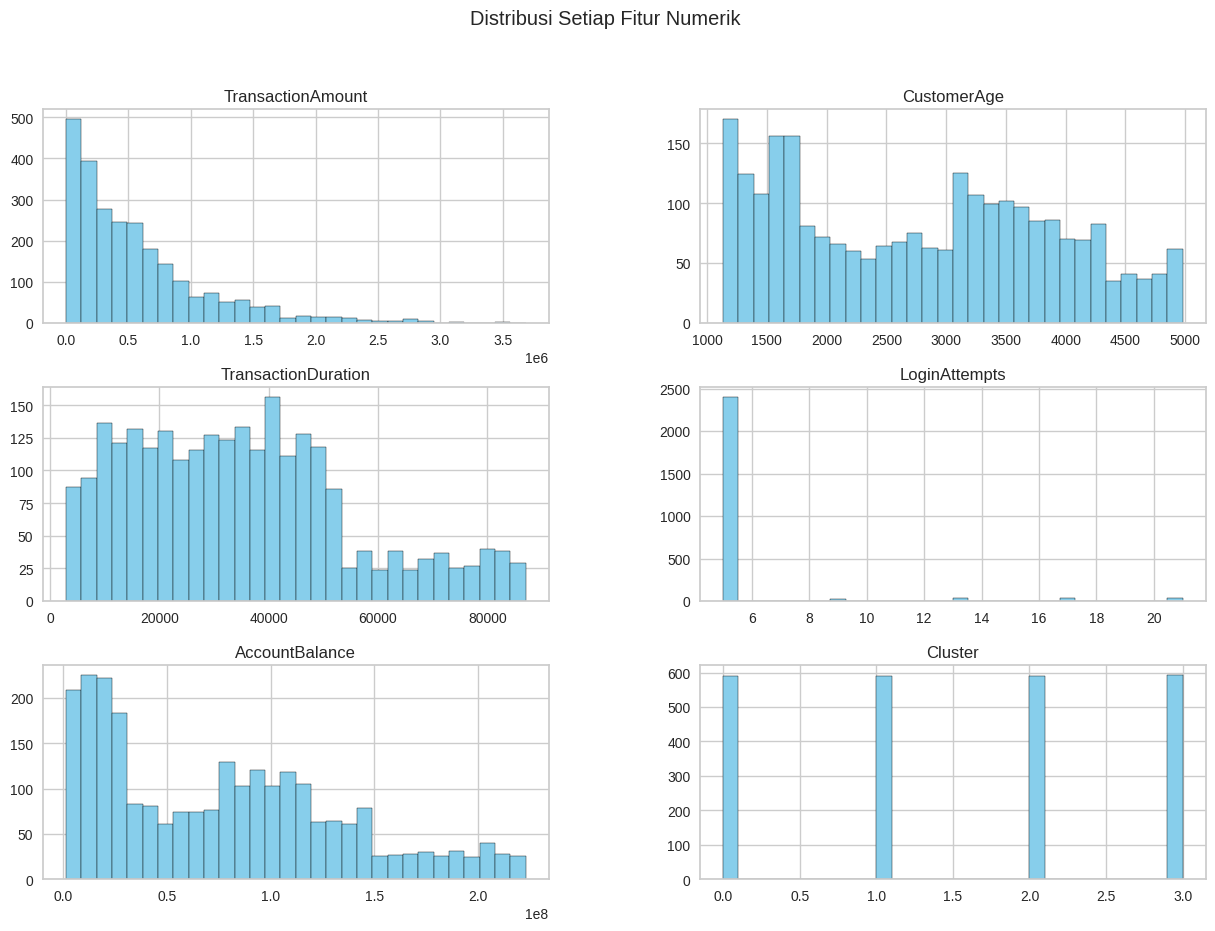

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=30 ,figsize=(15 ,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

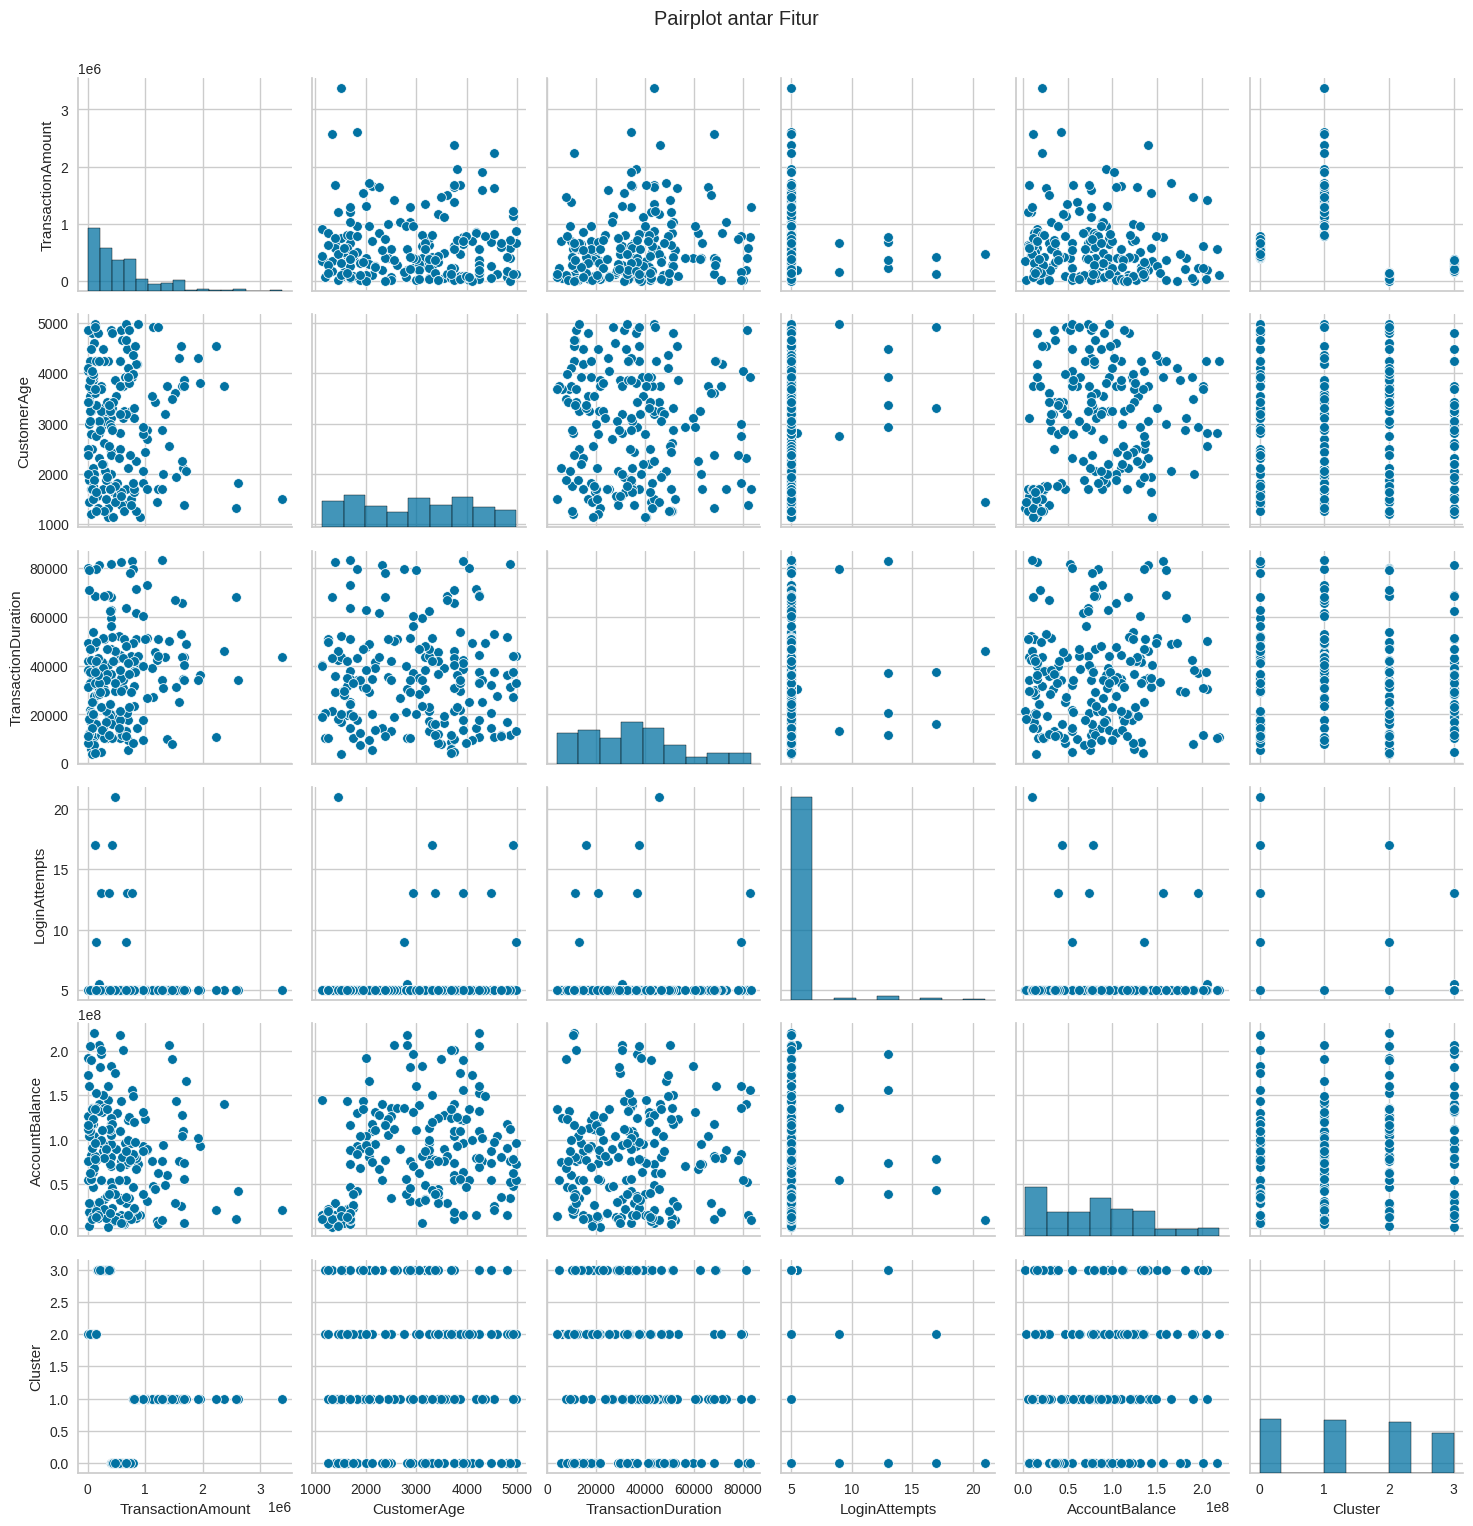

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df.select_dtypes(include='number').sample(200))
plt.suptitle('Pairplot antar Fitur', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
numerical_cols = df_scaled.select_dtypes(include=np.number).columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_scaled = df_scaled.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address'], axis=1)

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_scaled.select_dtypes(include='object').columns
encoders = {}
for col in categorical_cols:
    if col not in ['TransactionDate', 'PreviousTransactionDate']: # Exclude date columns
        le = LabelEncoder()
        df_scaled[col] = le.fit_transform(df_scaled[col])
        encoders[col] = le

df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,14,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,51,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,8,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,1,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,90,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()



['TransactionID',
 'AccountID',
 'TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

numerical_cols = df_scaled.select_dtypes(include=np.number).columns
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
for col in numerical_cols:
    df_scaled = cap_outliers(df_scaled, col)
print("Outliers handled using capping (IQR method).")


Outliers handled using capping (IQR method).


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df_scaled['AgeGroup'] = pd.cut(df_scaled['CustomerAge'],
                               bins=[0, 25, 40, 60, 100],
                               labels=['Young', 'Adult', 'Mature', 'Senior'])

df_scaled['AmountGroup'] = pd.qcut(df_scaled['TransactionAmount'],
                                   q=4,
                                   labels=['Low', 'Medium', 'High', 'Very High'])

label_encoder = LabelEncoder()
df_scaled['AgeGroup_enc'] = label_encoder.fit_transform(df_scaled['AgeGroup'])
df_scaled['AmountGroup_enc'] = label_encoder.fit_transform(df_scaled['AmountGroup'])

df_scaled[['CustomerAge', 'AgeGroup', 'AgeGroup_enc',
           'TransactionAmount', 'AmountGroup', 'AmountGroup_enc']].head()

,CustomerAge,AgeGroup,AgeGroup_enc,TransactionAmount,AmountGroup,AmountGroup_enc
0,0.838710,Young,0,0.007207,Low,1
1,0.806452,Young,0,0.195940,High,0
2,0.016129,Young,0,0.065680,Medium,2
3,0.129032,Young,0,0.096016,Medium,2
4,NaN,NaN,1,0.006874,Low,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_processed = df_scaled.copy()
df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,AgeGroup_enc,AmountGroup_enc
0,0.007207,2023-04-11 16:29:14,1.0,36.0,14.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,2024-11-04 08:08:08,Young,Low,0,1
1,0.195940,2023-06-27 16:44:19,1.0,15.0,51.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,2024-11-04 08:09:35,Young,High,0,0
2,0.065680,2023-07-10 18:16:08,1.0,23.0,8.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,2024-11-04 08:07:04,Young,Medium,0,2
3,0.096016,2023-05-05 16:32:11,1.0,33.0,1.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,2024-11-04 08:09:06,Young,Medium,0,2
4,0.006874,2023-10-16 17:51:24,1.0,1.0,90.0,2.0,NaN,3.0,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN,Low,1,1


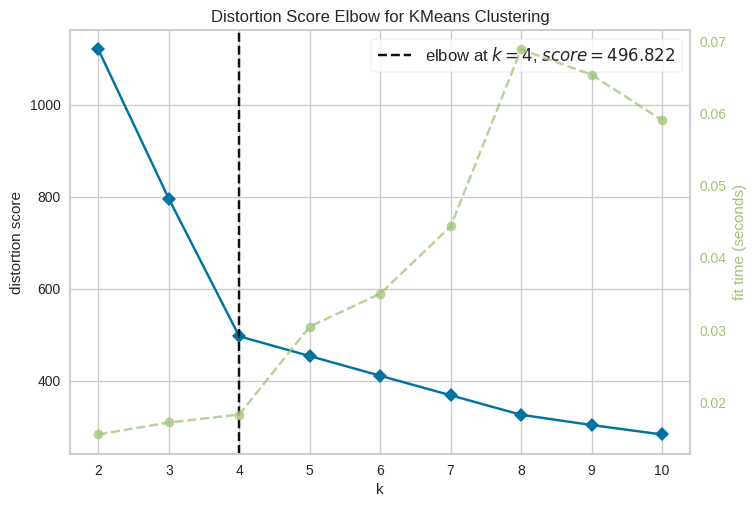

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

df_processed.fillna(df_processed.mean(numeric_only=True), inplace=True)
df_processed.dropna(inplace=True)

df_processed['AgeGroup'] = pd.cut(df_processed['CustomerAge'],
                               bins=[0, 25, 40, 60, 100],
                               labels=['Young', 'Adult', 'Mature', 'Senior'])

df_processed['AmountGroup'] = pd.qcut(df_processed['TransactionAmount'],
                                   q=4,
                                   labels=['Low', 'Medium', 'High', 'Very High'])

label_encoder = LabelEncoder()
df_processed['AgeGroup_enc'] = label_encoder.fit_transform(df_processed['AgeGroup'])
df_processed['AmountGroup_enc'] = label_encoder.fit_transform(df_processed['AmountGroup'])

X = df_processed[[
    "AgeGroup_enc",
    "AmountGroup_enc",
    "CustomerAge",
    "AccountBalance",
    "TransactionAmount",
    "TransactionDuration"
]]

model = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(X)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering

optimal_k = 4
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans.fit(X)

df_processed['Cluster'] = model_kmeans.labels_

df_scaled = df_scaled.merge(df_processed['Cluster'], left_index=True, right_index=True, how='left')

df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,AgeGroup_enc,AmountGroup_enc,Cluster_x,Cluster_y
0,0.007207,2023-04-11 16:29:14,1.0,36.0,14.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,2024-11-04 08:08:08,Young,Low,0,1,2.0,2.0
1,0.195940,2023-06-27 16:44:19,1.0,15.0,51.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,2024-11-04 08:09:35,Young,High,0,0,0.0,0.0
2,0.065680,2023-07-10 18:16:08,1.0,23.0,8.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,2024-11-04 08:07:04,Young,Medium,0,2,3.0,3.0
3,0.096016,2023-05-05 16:32:11,1.0,33.0,1.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,2024-11-04 08:09:06,Young,Medium,0,2,3.0,3.0
4,0.006874,2023-10-16 17:51:24,1.0,1.0,90.0,2.0,NaN,3.0,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN,Low,1,1,NaN,NaN


In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

In [ ]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters= 5 , random_state=42)
df_processed['Cluster'] = model_kmeans.fit_predict(X)
print(df_processed['Cluster'].value_counts())

Cluster
2    597
3    596
1    596
4    335
0    261
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

X_processed = df_processed[[
    "AgeGroup_enc",
    "AmountGroup_enc",
    "CustomerAge",
    "AccountBalance",
    "TransactionAmount",
    "TransactionDuration"
]]

y_kmeans = model_kmeans.predict(X_processed)

score = silhouette_score(X_processed, y_kmeans)
print("Silhouette Score:", score)

Silhouette Score: 0.5004744420086779


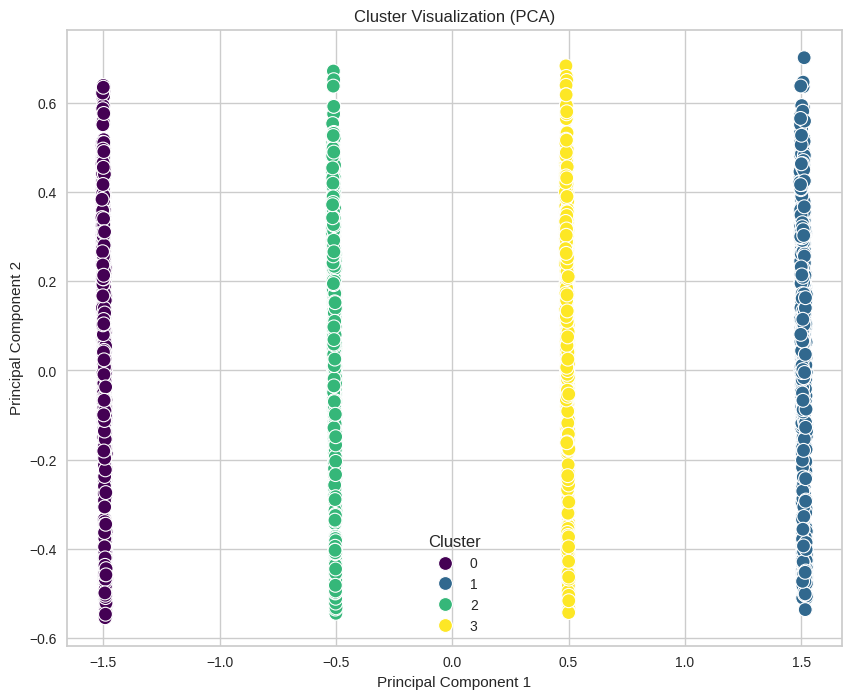

In [ ]:
# Membuat visualisasi hasil clustering

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

pca_df = pd.DataFrame(data = X_pca, columns = ['PCA1', 'PCA2'])
pca_df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

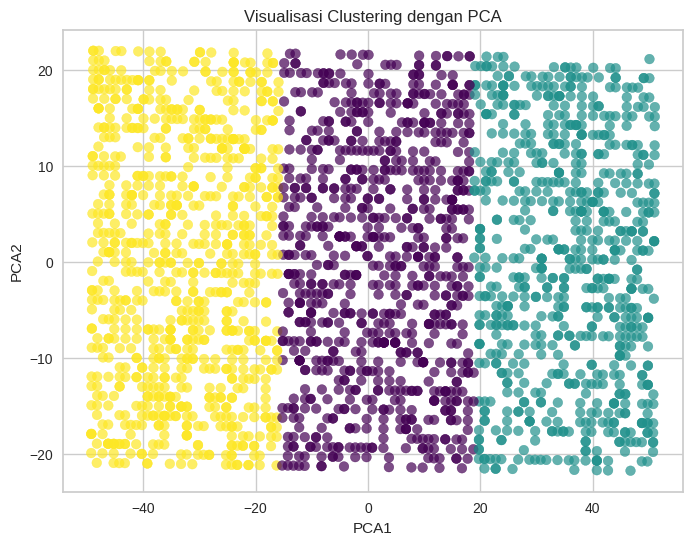

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
pca = PCA(n_components=2)
df_processed_numeric = df_processed.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'AgeGroup', 'AmountGroup'])
pca_data = pca.fit_transform(df_processed_numeric)
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
KMeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
KMeans_pca.fit(df_pca)
df_pca['Cluster'] = KMeans_pca.labels_
joblib.dump(pca, "PCA_model_clustering.h5")
joblib.dump(KMeans_pca, "Kmeans_PCA_model.h5")
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'],
            c=df_pca['Cluster'], cmap='viridis',alpha=0.7)
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [72]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)
df_processed = df_processed.reset_index(drop=True)
df = df.merge(df_processed['Cluster'], left_index=True, right_index=True, how='left')


cluster_summary = df.groupby("Cluster").agg({
    "TransactionAmount": ["mean", "min", "max"],
    "TransactionDuration": ["mean", "min", "max"],
    "CustomerAge": ["mean", "min", "max"],
    "AccountBalance": ["mean", "min", "max"]
})
print(cluster_summary)


cluster_summary_extended = df.groupby("Cluster").agg({
    "TransactionAmount": ["mean", "min", "max", "median", "std"],
    "TransactionDuration": ["mean", "min", "max", "median", "std"],
    "CustomerAge": ["mean", "min", "max", "median", "std"],
    "AccountBalance": ["mean", "min", "max", "median", "std"]
})
print(cluster_summary_extended)

cluster_summary_extended = cluster_summary_extended.reset_index()

        TransactionAmount                          TransactionDuration  \
                     mean        min           max                mean   
Cluster                                                                  
0.0         605607.311498   614.2920  3.682484e+06        34396.670997   
1.0         548384.954661  2705.8385  3.511496e+06        34206.755912   
2.0         596988.058283  1650.4710  3.161766e+06        35127.333261   
3.0         535643.561447   499.1610  3.513453e+06        35409.930480   

                          CustomerAge                 AccountBalance  \
            min      max         mean     min     max           mean   
Cluster                                                                
0.0      3200.0  86720.0  2795.204698  1134.0  4978.0   7.884715e+07   
1.0      2910.0  87010.0  2760.808938  1134.0  4978.0   7.282927e+07   
2.0      2910.0  85560.0  2819.954056  1134.0  4978.0   7.641609e+07   
3.0      2910.0  87010.0  2792.332748  1134.0  49

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Moderate Transaction Amount and Account Balance)**:
- **Rata-rata (mean) Transaction Amount:** 301.35
- **Rata-rata (mean) Transaction Duration:** 118.40
- **Rata-rata (mean) Customer Age:** 46.34
- **Rata-rata (mean) Account Balance:** 5093.03
- **Analisis:** Cluster ini ditandai dengan jumlah transaksi dan saldo akun yang moderat. Usia pelanggan dalam cluster ini cenderung di sekitar rata-rata. Durasi transaksi juga berada di kisaran rata-rata. Cluster ini mungkin mewakili pelanggan reguler dengan pola transaksi yang stabil.

2. **Cluster 1: (High Transaction Amount)**:
- **Rata-rata (mean) Transaction Amount:** 707.94
- **Rata-rata (mean) Transaction Duration:** 119.70
- **Rata-rata (mean) Customer Age:** 44.05
- **Rata-rata (mean) Account Balance:** 5124.38
- **Analisis:** Cluster ini memiliki rata-rata jumlah transaksi yang signifikan lebih tinggi dibandingkan cluster lainnya, while other attributes like transaction duration, age, and account balance are close to the overall average. This cluster might represent customers with high-value transactions.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={"Cluster":"Target"})

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.000000,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.000000,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.000000,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,3.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.000000,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,44.678444,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24.000000,Student,93.0,1.0,131.25,2024-11-04 08:07:49,0.0
2513,NaN,AC00304,313.69,2023-03-10 16:35:33,Debit,Oklahoma City,D000211,53.131.194.183,M034,Branch,73.000000,Retired,152.0,1.0,7093.68,2024-11-04 08:10:23,0.0
2523,TX001691,AC00442,12.18,2023-04-20 18:50:39,Debit,New York,D000326,190.152.148.249,M088,Branch,76.000000,Retired,77.0,1.0,4909.24,2024-11-04 08:07:37,2.0
2524,TX000076,AC00239,232.12,2023-12-28 17:31:03,Debit,Omaha,D000073,156.173.170.140,M066,ATM,37.000000,Engineer,51.0,1.0,6689.87,2024-11-04 08:09:17,0.0


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
# Update numerical_cols to reflect current numerical columns in df
original_numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[original_numerical_cols] = scaler.inverse_transform(df[original_numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,27036.8565,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,4358.000000,Doctor,23500.0,5.0,7.605312e+07,2024-11-04 08:08:08,2.0
1,TX000002,AC00455,721948.3840,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,4234.000000,Doctor,40900.0,5.0,2.046878e+08,2024-11-04 08:09:35,0.0
2,TX000003,AC00019,242331.8265,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,1196.000000,Student,16250.0,5.0,1.669701e+07,2024-11-04 08:07:04,3.0
3,TX000004,AC00070,354028.0850,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,1630.000000,Student,7260.0,5.0,1.274798e+08,2024-11-04 08:09:06,3.0
4,TX000005,AC00411,25808.7925,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,2788.063517,Student,57430.0,5.0,1.105254e+08,2024-11-04 08:06:39,NaN


In [73]:
# inverse dataset that has been encoded to its original categories.
for col in categorical_cols:
    if col in encoders:
        le = encoders[col]

        if pd.api.types.is_numeric_dtype(df_scaled[col]) and df_scaled[col].notna().any():
            encoded_data = df_scaled[col].dropna().astype(int)

            valid_encoded_data = encoded_data[encoded_data.isin(le.classes_)]
            if not valid_encoded_data.empty:
                 inverse_transformed_values = le.inverse_transform(valid_encoded_data)

                 inverse_transformed_series = pd.Series(inverse_transformed_values, index=valid_encoded_data.index)

                 df.update(inverse_transformed_series)
            else:
                 print(f"Warning: No valid encoded labels found in column '{col}' for inverse transformation.")
        else:
            print(f"Warning: Column '{col}' in df_scaled is not numeric or contains only NaNs. Skipping inverse transformation.")


df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster_x,Cluster_y,Cluster
0,TX000001,AC00128,27036.8565,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,4358.000000,Doctor,23500.0,5.0,7.605312e+07,2024-11-04 08:08:08,2.0,2.0,2.0
1,TX000002,AC00455,721948.3840,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,4234.000000,Doctor,40900.0,5.0,2.046878e+08,2024-11-04 08:09:35,0.0,0.0,0.0
2,TX000003,AC00019,242331.8265,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,1196.000000,Student,16250.0,5.0,1.669701e+07,2024-11-04 08:07:04,3.0,3.0,3.0
3,TX000004,AC00070,354028.0850,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,1630.000000,Student,7260.0,5.0,1.274798e+08,2024-11-04 08:09:06,3.0,3.0,3.0
4,TX000005,AC00411,25808.7925,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,2788.063517,Student,57430.0,5.0,1.105254e+08,2024-11-04 08:06:39,NaN,NaN,2.0


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Moderate Transaction Amount and Account Balance)**:
- **Rata-rata (mean) Transaction Amount:** 578244.7
- **Rata-rata (mean) Transaction Duration:** 34346.07
- **Rata-rata (mean) Customer Age:** 2890.88
- **Rata-rata (mean) Account Balance:** 75767760.0
- **Mode Transaction Type:** Debit
- **Mode Location:** Fort Worth
- **Mode MerchantID:** M088
- **Mode Channel:** Branch
- **Mode Customer Occupation:** Retired
- **Analisis:** Cluster ini ditandai dengan jumlah transaksi dan saldo akun yang moderat. Usia pelanggan dalam cluster ini cenderung di sekitar rata-rata. Durasi transaksi juga berada di kisaran rata-rata. Pelanggan dalam cluster ini cenderung menggunakan channel Branch dan MerchantID M088, dengan Customer Occupation Retired menjadi mode.

2. **Cluster 1: (High Transaction Amount)**:
- **Rata-rata (mean) Transaction Amount:** 1358436.0
- **Rata-rata (mean) Transaction Duration:** 34721.92
- **Rata-rata (mean) Customer Age:** 2749.26
- **Rata-rata (mean) Account Balance:** 76234130.0
- **Mode Transaction Type:** Debit
- **Mode Location:** San Jose
- **Mode MerchantID:** [M026, M036, M038, M048]
- **Mode Channel:** ATM
- **Mode Customer Occupation:** Student
- **Analisis:** Cluster ini memiliki rata-rata jumlah transaksi yang signifikan lebih tinggi dibandingkan cluster lainnya,sementara atribut lain seperti durasi transaksi, usia, dan saldo rekening mendekati rata-rata keseluruhan. Klaster ini mungkin mewakili pelanggan dengan transaksi bernilai tinggi yang cenderung menggunakan ATM di San Jose dan memiliki berbagai MerchantID, dengan Pelajar sebagai pekerjaan yang paling umum..

3. **Cluster 2: (Low Transaction Amount)**:
- **Rata-rata (mean) Transaction Amount:** 76258.74
- **Rata-rata (mean) Transaction Duration:** 34518.87
- **Rata-rata (mean) Customer Age:** 2872.62
- **Rata-rata (mean) Account Balance:** 78739750.0
- **Mode Transaction Type:** Debit
- **Mode Location:** Charlotte
- **Mode MerchantID:** [M004, M062, M070, M090]
- **Mode Channel:** Branch
- **Mode Customer Occupation:** Doctor
- **Analisis:** Cluster ini menunjukkan rata-rata jumlah transaksi yang rendah. Transaction duration, customer age, and account balance are relatively similar to other clusters. Customers in this cluster primarily use the Branch channel in Charlotte and have various MerchantIDs, with Doctor being the most common occupation.

4. **Cluster 3: (Moderate Transaction Amount, Lower Age)**:
- **Rata-rata (mean) Transaction Amount:** 271294.4
- **Rata-rata (mean) Transaction Duration:** 34630.48
- **Rata-rata (mean) Customer Age:** 2803.71
- **Rata-rata (mean) Account Balance:** 78698230.0
- **Mode Transaction Type:** Debit
- **Mode Location:** [Philadelphia, Tucson]
- **Mode MerchantID:** M026
- **Mode Channel:** Branch
- **Mode Customer Occupation:** Engineer
- **Analisis:** Cluster ini memiliki jumlah transaksi moderat dan usia rata-rata pelanggan yang sedikit lebih rendah dibandingkan klaster lain. Durasi transaksi dan saldo akun serupa dengan klaster lain. Pelanggan ini cenderung menggunakan kanal Cabang di Philadelphia atau Tucson dan terutama berinteraksi dengan MerchantID M026, dengan posisi Engineer sebagai pekerjaan yang paling umum

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic
#tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
cluster_summary_inverse = df.groupby("Cluster").agg({
    "TransactionAmount": ["mean", "min", "max"],
    "TransactionDuration": ["mean", "min", "max"],
    "CustomerAge": ["mean", "min", "max"],
    "AccountBalance": ["mean", "min", "max"],
    "TransactionType": pd.Series.mode,
    "Location": pd.Series.mode,
    "MerchantID": pd.Series.mode,
    "Channel": pd.Series.mode,
    "CustomerOccupation": pd.Series.mode
})
print(cluster_summary_inverse)

        TransactionAmount                            TransactionDuration  \
                     mean          min           max                mean   
Cluster                                                                    
0.0          5.782447e+05  405568.3960  7.956322e+05        34346.067536   
1.0          1.358436e+06  795881.6745  3.682484e+06        34721.921815   
2.0          7.625874e+04     499.1610  1.557149e+05        34518.867359   
3.0          2.712944e+05  155945.1995  4.052230e+05        34630.482963   

                          CustomerAge                 AccountBalance  \
            min      max         mean     min     max           mean   
Cluster                                                                
0.0      2910.0  87010.0  2890.876481  1196.0  4978.0   7.576776e+07   
1.0      2910.0  87010.0  2749.257627  1196.0  4978.0   7.623413e+07   
2.0      2910.0  86430.0  2872.622673  1196.0  4978.0   7.873975e+07   
3.0      2910.0  86720.0  2803.7060

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster:0 (___)**:
  - **Rata-rata (mean) <Fitur>:**


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_final = df.copy()
df_final = df_final.rename(columns={"Cluster":"Target"})
df_final.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,TX000001,AC00128,27036.8565,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,4358.000000,Doctor,23500.0,5.0,7.605312e+07,2024-11-04 08:08:08,2.0
1,TX000002,AC00455,721948.3840,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,4234.000000,Doctor,40900.0,5.0,2.046878e+08,2024-11-04 08:09:35,0.0
2,TX000003,AC00019,242331.8265,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,1196.000000,Student,16250.0,5.0,1.669701e+07,2024-11-04 08:07:04,3.0
3,TX000004,AC00070,354028.0850,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,1630.000000,Student,7260.0,5.0,1.274798e+08,2024-11-04 08:09:06,3.0
4,TX000005,AC00411,25808.7925,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,2788.063517,Student,57430.0,5.0,1.105254e+08,2024-11-04 08:06:39,NaN


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final.to_csv('data_clustering_inverse.csv', index=False)
print(" Data final berhasil disimpan ke data_clustering_inverse.csv")

 Data final berhasil disimpan ke data_clustering_inverse.csv


End of Code.